In [1]:
import pandas as pd
from matplotlib import pyplot as plt
price = pd.read_csv('./data/onion_price.csv')
path = 'data/onion_supply/onion'
product = pd.read_excel('./data/onion_area.xlsx')
im_ex_port = pd.read_csv('./data/onion_monthly_im_ex_port.csv', encoding='euc-kr')


price['년도'] = price['년도'].apply(lambda x: str(x))
price['월'] = price['월'].apply(lambda x: '0' + str(x) if x < 10 else str(x))
o00 = pd.read_excel('./{}_00.xlsx'.format(path))
o01 = pd.read_excel('./{}_01.xlsx'.format(path))
o02 = pd.read_excel('./{}_02.xlsx'.format(path))
o03 = pd.read_excel('./{}_03.xlsx'.format(path))
o04 = pd.read_excel('./{}_04.xlsx'.format(path))
o05 = pd.read_excel('./{}_05.xlsx'.format(path))
o06 = pd.read_excel('./{}_06.xlsx'.format(path))
o07 = pd.read_excel('./{}_07.xlsx'.format(path))
o08 = pd.read_excel('./{}_08.xlsx'.format(path))
o09 = pd.read_excel('./{}_09.xlsx'.format(path))
o10 = pd.read_excel('./{}_10.xlsx'.format(path))
o11 = pd.read_excel('./{}_11.xlsx'.format(path))
o12 = pd.read_excel('./{}_12.xlsx'.format(path))
o13 = pd.read_excel('./{}_13.xlsx'.format(path))
o14 = pd.read_excel('./{}_14.xlsx'.format(path))
o15 = pd.read_excel('./{}_15.xlsx'.format(path))
o16 = pd.read_excel('./{}_16.xlsx'.format(path))
o17 = pd.read_excel('./{}_17.xlsx'.format(path))
o18 = pd.read_excel('./{}_18.xlsx'.format(path))
o19 = pd.read_excel('./{}_19.xlsx'.format(path))

supply = pd.concat([o00, o01, o02, o03, o04, o05, o06, o07, o08, o09, o10, o11, o12, o13, o14, o15, o16, o17, o18, o19])
# supply = supply[2:]
supply['년도'] = supply['거래년월일'].apply(lambda x: str(x)[:4]).astype(str)
supply['월'] = supply['거래년월일'].apply(lambda x: str(x)[4:6]).astype(str)
supply['거래량'] = supply['거래량'].apply(lambda x: ''.join(str(x).split(','))).astype(int)
# product['년도'] = product['년도'].apply(lambda x: str(x))

# im_ex_port['년도'] = im_ex_port['년도'].apply(lambda x: str(x))
# im_ex_port['수출(중량)'] = im_ex_port['수출(중량)'].apply(lambda x: str(x))
# im_ex_port['수입(중량)'] = im_ex_port['수입(중량)'].apply(lambda x: str(x))
# im_ex_port['월'] = im_ex_port['월'].apply(lambda x: '0' + str(x) if x < 10 else str(x))

In [2]:
price.head()

,년도,월,가격
0,2000,01,479
1,2000,02,516
2,2000,03,744
3,2000,04,953
4,2000,05,616


In [3]:
supply.head()

,거래년월일,품목명,시장코드,시장명,출하지코드,출하지명,거래량,품목코드,년도,월
0,총 합계,전체,NaN,NaN,NaN,NaN,109008214,NaN,총 합계,
1,소계,양파(일반),NaN,NaN,NaN,NaN,109008214,120101.0,소계,
2,20001230,양파(일반),110001.0,서울가락도매시장,232000,강원도평창군,6960,120101.0,2000,12
3,20001230,양파(일반),110001.0,서울가락도매시장,770000,경상북도영천시,29090,120101.0,2000,12
4,20001230,양파(일반),110001.0,서울가락도매시장,525000,전라남도함평군,40731,120101.0,2000,12


In [4]:
# product.head()

In [5]:
# im_ex_port.head()

In [6]:
# product_10 = product[product['년도']>'2009']
# supply_10 = supply[supply['년도']>'2009'].dropna().reset_index(drop=True)
# price_10 = price[price['년도']>'2009']

In [7]:
sup_total = supply.groupby(['년도','월'], as_index=False).sum()
sup_total.head()

,년도,월,시장코드,거래량,품목코드
0,2000,01,107100074.0,4088280.0,56927874.0
1,2000,02,98405524.0,3557610.0,50922824.0
2,2000,03,124238375.0,4605658.0,69058075.0
3,2000,04,160331378.0,11877910.0,93438578.0
4,2000,05,209473736.0,20421827.0,124424636.0


In [8]:
# df2 = im_ex_port.loc[111:]
# im_ex_port.loc[111] = ['2019','04','0','0']
# im_ex_port = im_ex_port[:112]
# im_ex_port = pd.concat([im_ex_port, df2])
# im_ex_port = im_ex_port[:-3] 
# im_ex_port

In [9]:
merged = pd.merge(price, sup_total, on=['년도','월'])
merged

,년도,월,가격,시장코드,거래량,품목코드
0,2000,01,479,107100074.0,4088280.0,56927874.0
1,2000,02,516,98405524.0,3557610.0,50922824.0
2,2000,03,744,124238375.0,4605658.0,69058075.0
3,2000,04,953,160331378.0,11877910.0,93438578.0
4,2000,05,616,209473736.0,20421827.0,124424636.0
...,...,...,...,...,...,...
235,2019,08,500,474837073.0,11930394.0,217623012.0
236,2019,09,539,380078208.0,12329636.0,174506753.0
237,2019,10,521,435523559.0,13598455.0,200328468.0
238,2019,11,605,401731531.0,12481686.0,186276651.0


In [10]:
# merged = pd.merge(df, im_ex_port,on=['년도','월'])
merged = merged[['년도','월','가격','거래량']]#,'수출(중량)', '수입(중량)']]

merged['거래월'] = merged[['년도','월']].apply(lambda x: '-'.join(x), axis=1)
merged.to_csv('onion_for_predict.csv',index=False)

C:\Users\dl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
# merged.groupby(['년도','월']).sum()
x = merged['거래월']
y1 = merged['가격']
y2 = merged['거래량']
# y3 = merged['수출(중량)']
# y4 = merged['수입(중량)']
merged

,년도,월,가격,거래량,거래월
0,2000,01,479,4088280.0,2000-01
1,2000,02,516,3557610.0,2000-02
2,2000,03,744,4605658.0,2000-03
3,2000,04,953,11877910.0,2000-04
4,2000,05,616,20421827.0,2000-05
...,...,...,...,...,...
235,2019,08,500,11930394.0,2019-08
236,2019,09,539,12329636.0,2019-09
237,2019,10,521,13598455.0,2019-10
238,2019,11,605,12481686.0,2019-11


C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44036 missing from current font.
  font.

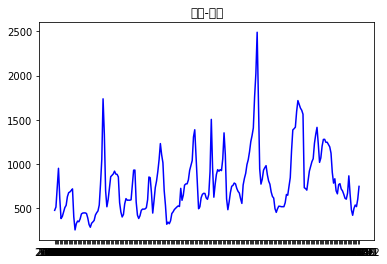

In [12]:
plt.title("시간-가격")
plt.plot(x,y1,'b')
plt.show()

C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  fon

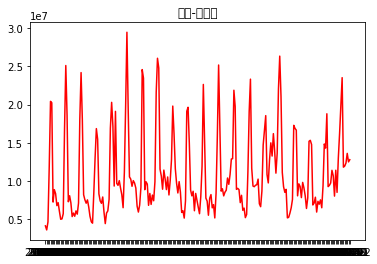

In [13]:
plt.title("시간-거래량")
plt.plot(x,y2,'r')
plt.show()

In [14]:
# plt.plot(x,y3,'g', label='export') # 수출
# plt.plot(x,y4,'y', label='import') # 수입
# plt.show()

NameError: name 'y3' is not defined

# pepper

In [ ]:
price = pd.read_csv('./data/pepper_price.csv')
path = 'data/pepper_supply/pepper'
product = pd.read_excel('./data/pepper_area.xlsx')
im_ex_port = pd.read_csv('./data/pepper_monthly_im_ex_port.csv', encoding='euc-kr')

In [ ]:
price['년도'] = price['년도'].apply(lambda x: str(x))
price['월'] = price['월'].apply(lambda x: '0' + str(x) if x < 10 else str(x))
o00 = pd.read_excel('./{}_00.xlsx'.format(path))
o01 = pd.read_excel('./{}_01.xlsx'.format(path))
o02 = pd.read_excel('./{}_02.xlsx'.format(path))
o03 = pd.read_excel('./{}_03.xlsx'.format(path))
o04 = pd.read_excel('./{}_04.xlsx'.format(path))
o05 = pd.read_excel('./{}_05.xlsx'.format(path))
o06 = pd.read_excel('./{}_06.xlsx'.format(path))
o07 = pd.read_excel('./{}_07.xlsx'.format(path))
o08 = pd.read_excel('./{}_08.xlsx'.format(path))
o09 = pd.read_excel('./{}_09.xlsx'.format(path))
o10 = pd.read_excel('./{}_10.xlsx'.format(path))
o11 = pd.read_excel('./{}_11.xlsx'.format(path))
o12 = pd.read_excel('./{}_12.xlsx'.format(path))
o13 = pd.read_excel('./{}_13.xlsx'.format(path))
o14 = pd.read_excel('./{}_14.xlsx'.format(path))
o15 = pd.read_excel('./{}_15.xlsx'.format(path))
o16 = pd.read_excel('./{}_16.xlsx'.format(path))
o17 = pd.read_excel('./{}_17.xlsx'.format(path))
o18 = pd.read_excel('./{}_18.xlsx'.format(path))
o19 = pd.read_excel('./{}_19.xlsx'.format(path))

supply = pd.concat([o00, o01, o02, o03, o04, o05, o06, o07, o08, o09, o10, o11, o12, o13, o14, o15, o16, o17, o18, o19])
# supply = supply[2:]
supply['년도'] = supply['거래년월일'].apply(lambda x: str(x)[:4]).astype(str)
supply['월'] = supply['거래년월일'].apply(lambda x: str(x)[4:6]).astype(str)
supply['거래량'] = supply['거래량'].apply(lambda x: ''.join(str(x).split(','))).astype(int)
product['년도'] = product['년도'].apply(lambda x: str(x))

im_ex_port['년도'] = im_ex_port['년도'].apply(lambda x: str(x))
im_ex_port['수출(중량)'] = im_ex_port['수출(중량)'].apply(lambda x: str(x))
im_ex_port['수입(중량)'] = im_ex_port['수입(중량)'].apply(lambda x: str(x))
im_ex_port['월'] = im_ex_port['월'].apply(lambda x: '0' + str(x) if x < 10 else str(x))

In [ ]:
product_10 = product[product['년도']>'2009']
supply_10 = supply[supply['년도']>'2009'].dropna().reset_index(drop=True)
price_10 = price[price['년도']>'2009']
sup_total = supply_10.groupby(['년도','월'], as_index=False).sum()
im_ex_port.tail(20)

In [ ]:
df2 = im_ex_port.loc[111:]
im_ex_port.loc[111] = ['2019','04','0','0']
im_ex_port = im_ex_port[:112]
im_ex_port = pd.concat([im_ex_port, df2])
im_ex_port = im_ex_port[:-3] 

In [ ]:
df = pd.merge(price_10, sup_total, on=['년도','월'])
merged = pd.merge(df, im_ex_port,on=['년도','월'])
merged2 = merged[['년도','월','가격','거래량','수출(중량)', '수입(중량)']]

merged2['거래월'] = merged2[['년도','월']].apply(lambda x: '-'.join(x), axis=1)
merged2

In [ ]:
x = merged2['거래월']
y1 = merged2['가격']
y2 = merged2['거래량']
y3 = merged2['수출(중량)']
y4 = merged2['수입(중량)']
plt.plot(x,y1,'b')
plt.show()

In [ ]:
plt.plot(x,y2,'r')
plt.show()

In [ ]:
plt.plot(x,y3,'g', label='export') # 수출
plt.plot(x,y4,'y', label='import') # 수입
plt.show()

# garlic

In [ ]:
price = pd.read_csv('./data/garlic_price.csv')
path = 'data/garlic_supply/garlic'
product = pd.read_excel('./data/garlic_area.xlsx')
im_ex_port = pd.read_csv('./data/garlic_monthly_im_ex_port.csv', encoding='euc-kr')

In [ ]:
price['년도'] = price['년도'].apply(lambda x: str(x))
price['월'] = price['월'].apply(lambda x: '0' + str(x) if x < 10 else str(x))
o00 = pd.read_excel('./{}_00.xlsx'.format(path))
o01 = pd.read_excel('./{}_01.xlsx'.format(path))
o02 = pd.read_excel('./{}_02.xlsx'.format(path))
o03 = pd.read_excel('./{}_03.xlsx'.format(path))
o04 = pd.read_excel('./{}_04.xlsx'.format(path))
o05 = pd.read_excel('./{}_05.xlsx'.format(path))
o06 = pd.read_excel('./{}_06.xlsx'.format(path))
o07 = pd.read_excel('./{}_07.xlsx'.format(path))
o08 = pd.read_excel('./{}_08.xlsx'.format(path))
o09 = pd.read_excel('./{}_09.xlsx'.format(path))
o10 = pd.read_excel('./{}_10.xlsx'.format(path))
o11 = pd.read_excel('./{}_11.xlsx'.format(path))
o12 = pd.read_excel('./{}_12.xlsx'.format(path))
o13 = pd.read_excel('./{}_13.xlsx'.format(path))
o14 = pd.read_excel('./{}_14.xlsx'.format(path))
o15 = pd.read_excel('./{}_15.xlsx'.format(path))
o16 = pd.read_excel('./{}_16.xlsx'.format(path))
o17 = pd.read_excel('./{}_17.xlsx'.format(path))
o18 = pd.read_excel('./{}_18.xlsx'.format(path))
o19 = pd.read_excel('./{}_19.xlsx'.format(path))

supply = pd.concat([o00, o01, o02, o03, o04, o05, o06, o07, o08, o09, o10, o11, o12, o13, o14, o15, o16, o17, o18, o19])
# supply = supply[2:]
supply['년도'] = supply['거래년월일'].apply(lambda x: str(x)[:4]).astype(str)
supply['월'] = supply['거래년월일'].apply(lambda x: str(x)[4:6]).astype(str)
supply['거래량'] = supply['거래량'].apply(lambda x: ''.join(str(x).split(','))).astype(int)
product['년도'] = product['년도'].apply(lambda x: str(x))

im_ex_port['년도'] = im_ex_port['년도'].apply(lambda x: str(x))
im_ex_port['수출(중량)'] = im_ex_port['수출(중량)'].apply(lambda x: str(x))
im_ex_port['수입(중량)'] = im_ex_port['수입(중량)'].apply(lambda x: str(x))
im_ex_port['월'] = im_ex_port['월'].apply(lambda x: '0' + str(x) if x < 10 else str(x))

In [ ]:
product_10 = product[product['년도']>'2009']
supply_10 = supply[supply['년도']>'2009'].dropna().reset_index(drop=True)
price_10 = price[price['년도']>'2009']
sup_total = supply_10.groupby(['년도','월'], as_index=False).sum()
im_ex_port.tail(20)

In [ ]:
df2 = im_ex_port.loc[111:]
im_ex_port.loc[111] = ['2019','04','0','0']
im_ex_port = im_ex_port[:112]
im_ex_port = pd.concat([im_ex_port, df2])
im_ex_port = im_ex_port[:-3] 

In [ ]:
df = pd.merge(price_10, sup_total, on=['년도','월'])
merged = pd.merge(df, im_ex_port,on=['년도','월'])
merged2 = merged[['년도','월','가격','거래량','수출(중량)', '수입(중량)']]

merged2['거래월'] = merged2[['년도','월']].apply(lambda x: '-'.join(x), axis=1)
merged2

In [ ]:
x = merged2['거래월']
y1 = merged2['가격']
y2 = merged2['거래량']
y3 = merged2['수출(중량)']
y4 = merged2['수입(중량)']
plt.plot(x,y1,'b')
plt.show()

In [ ]:
plt.plot(x,y2,'r')
plt.show()

In [ ]:
plt.plot(x,y3,'g', label='export') # 수출
plt.plot(x,y4,'y', label='import') # 수입
plt.show()